In [1]:
from fastai.data.block import DataBlock
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = Path('/home/dant/data')

In [3]:
fns = get_image_files(path)
len(fns)

2550

In [4]:
failed = verify_images(fns)
len(failed)

0

In [5]:
failed.map(Path.unlink);


In [26]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
    # item_tfms=RandomResizedCrop(128, min_scale=0.8))


In [27]:
dls = db.dataloaders(path)

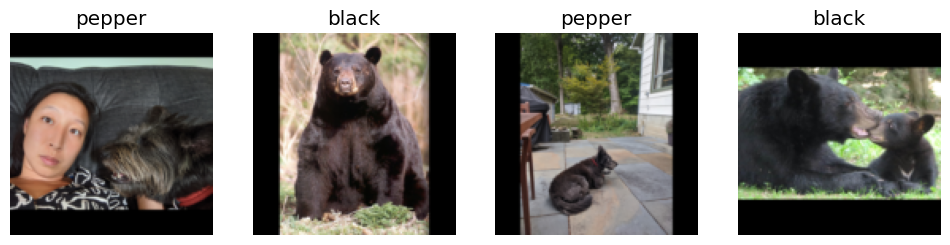

In [28]:
dls.valid.show_batch(max_n=4, nrows=1, unique=False)

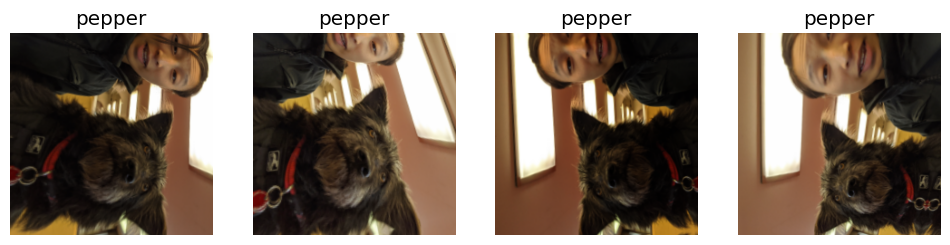

In [29]:
db = db.new(item_tfms=RandomResizedCrop(224, min_scale=0.8), batch_tfms=aug_transforms())
dls = db.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


In [30]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.217617,0.264389,0.082515,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.231341,0.075900,0.017682,00:15
1,0.127161,0.030677,0.005894,00:15
2,0.076152,0.028009,0.003929,00:16
3,0.055460,0.030186,0.001965,00:16


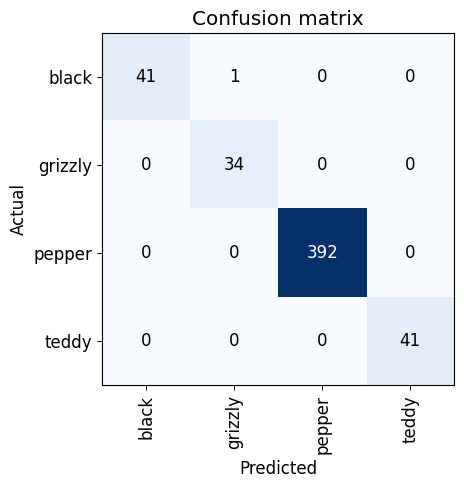

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

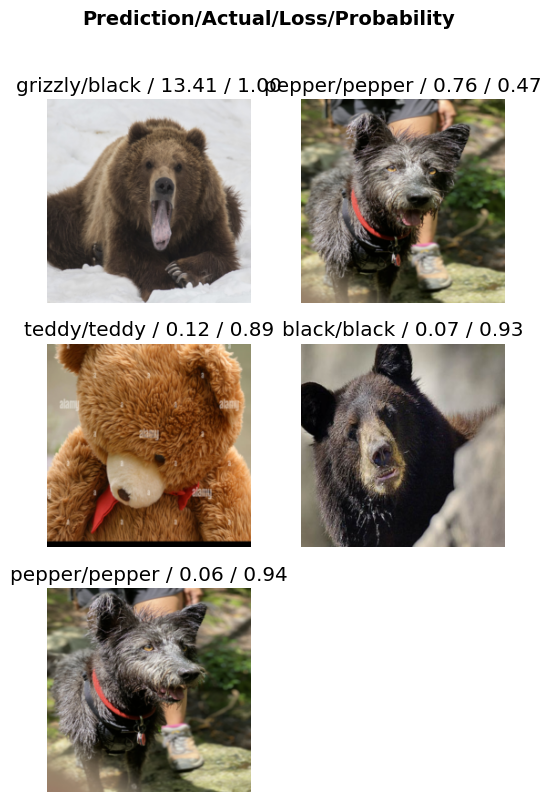

In [32]:
interp.plot_top_losses(5, nrows=3)


In [33]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [18]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)